# Tarea - Ajuste de curvas

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [5]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt


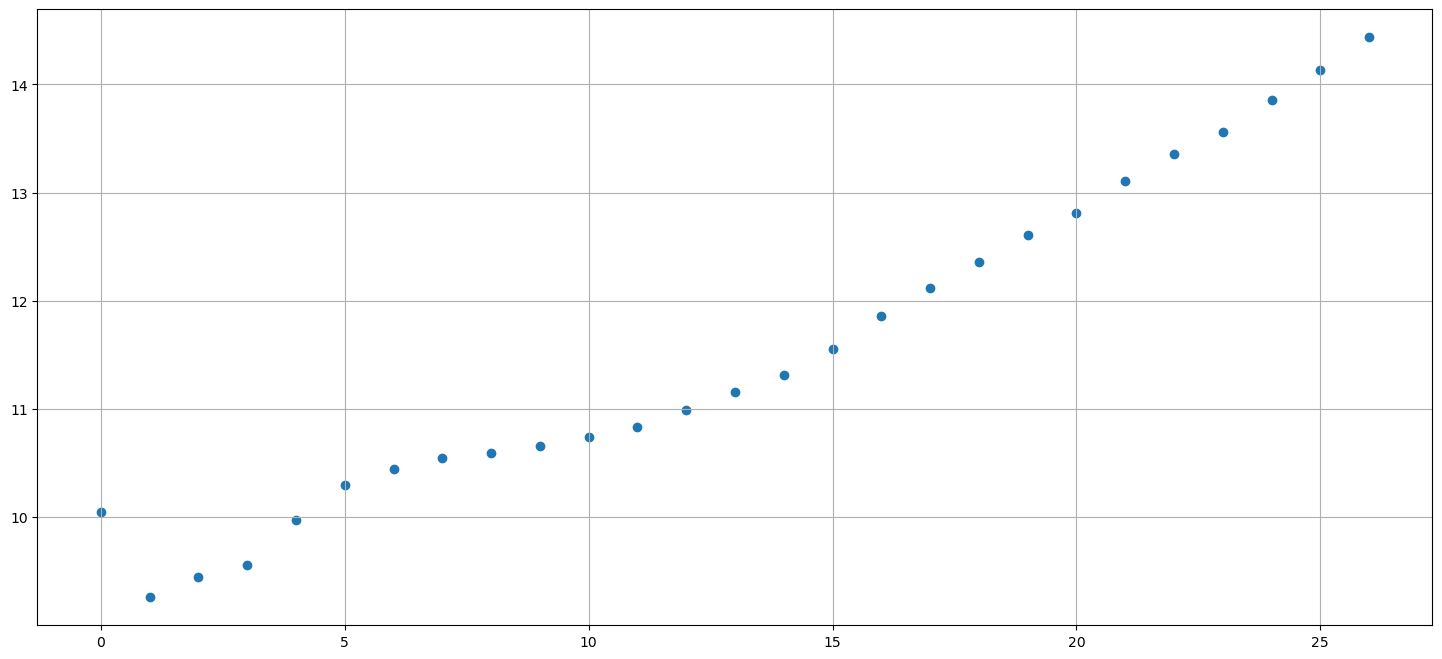

In [7]:
m=len(data)

xn=np.linspace(0, m-1, m)
plt.figure(figsize=(18,8))
plt.scatter(xn, data)
plt.grid()

In [8]:

ones=np.ones([m, 1])
x_factor=np.reshape(xn,[m,1])

X=np.hstack((ones,x_factor))
y_vector=np.reshape(data, [m, 1])

def funcion_de_costo(beta, X, y):
    m, n=X.shape
    beta=np.reshape(beta, [n, 1])
    y_pred=X @ beta
    error=y_pred - y
    return ( error.T @ error)[0][0]



In [9]:
beta=np.random.rand(2)
x_factor=np.reshape(xn, [m, 1])
X=np.hstack((ones, x_factor))
uno=opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

In [10]:
beta=np.random.rand(3)
x2_factor=np.reshape(xn**2, [m, 1])
X2=np.hstack((ones, x_factor, x2_factor))
dos=opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

In [11]:
beta=np.random.rand(4)
x3_factor=np.reshape(xn**3, [m, 1])
X3=np.hstack((ones, x_factor, x2_factor, x3_factor))
tres=opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

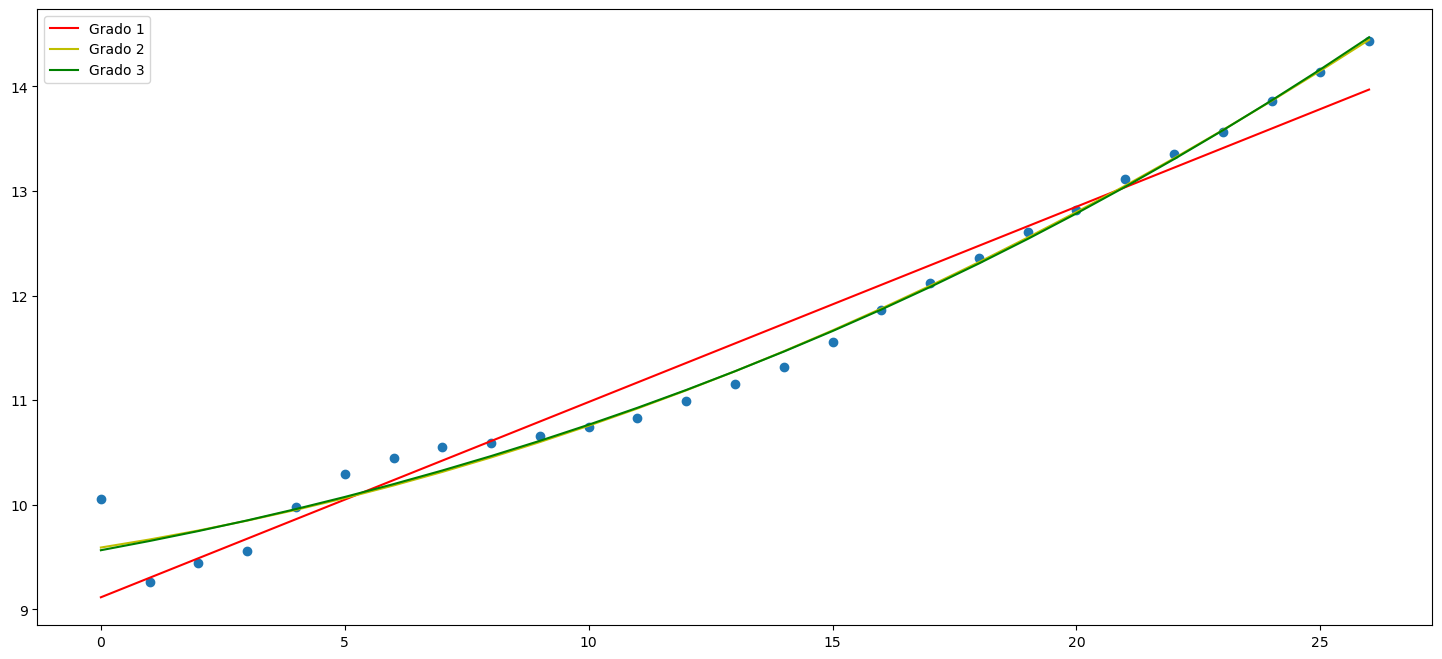

In [12]:
plt.figure(figsize=(18,8))
plt.scatter(xn, data)
plt.plot(xn, X @ np.reshape(uno.x, [2, 1]), "r" ,label="Grado 1")
plt.plot(xn, X2 @ np.reshape(dos.x, [3, 1]), "y", label="Grado 2")
plt.plot(xn, X3 @ np.reshape(tres.x, [4, 1]), "g", label="Grado 3")
plt.legend(loc="best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [14]:
import pandas as pd

data=pd.read_csv("population_data.csv")
poblacion = np.array(data["Poblacion"])
nacimientos = np.array(data["Nacimientos"])
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


## Años con población

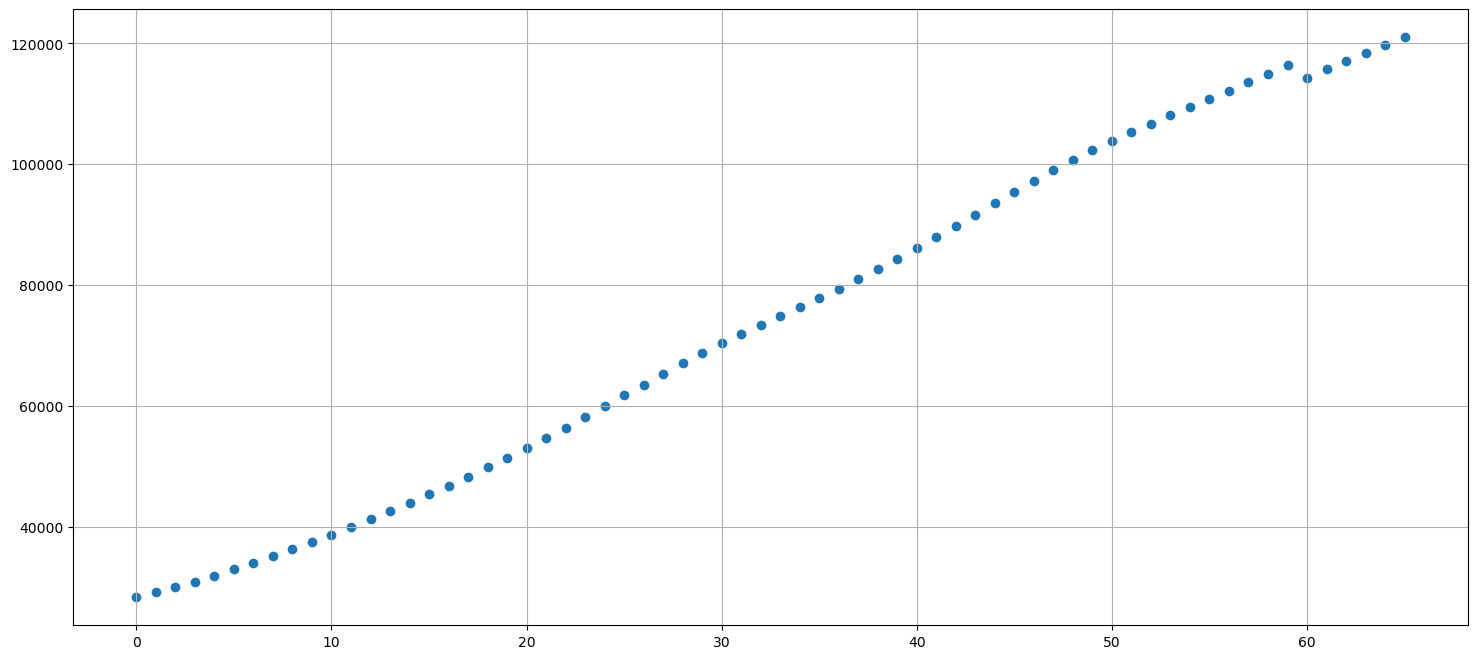

In [15]:
m=len(poblacion)

xn=np.linspace(0, m-1, m)

plt.figure(figsize=(18,8))
plt.scatter(xn, poblacion)
plt.grid()

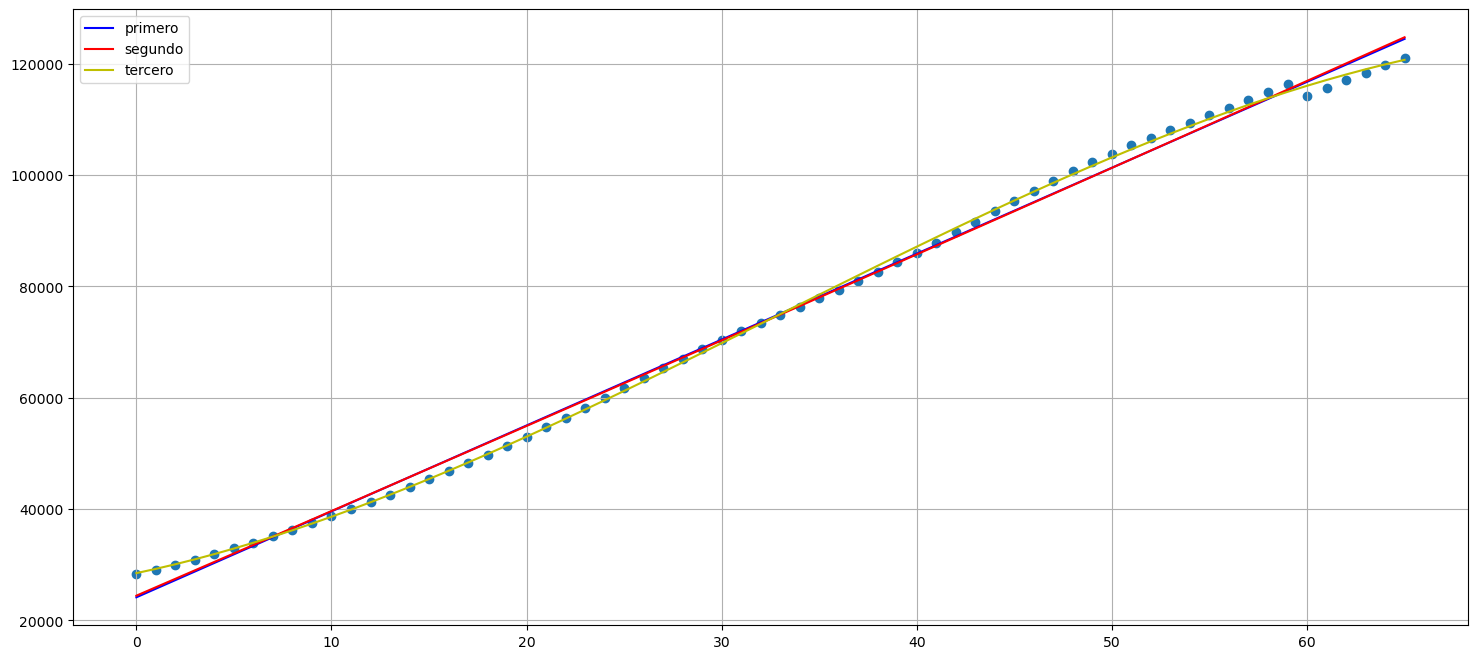

In [20]:
def funcioncosto(beta, X, y):
    m, n=X.shape
    beta=np.reshape(beta, [n, 1])
    y_pred=X @ beta
    error=y_pred - y
    return (error.T @ error)[0][0]


ones=np.ones([m, 1])
y_vector=np.reshape(poblacion, [m, 1])

beta=np.random.rand(2)
x_factor=np.reshape(xn, [m, 1])
X=np.hstack((ones, x_factor))
uno=opt.minimize(funcioncosto, beta, args=(X, y_vector))

beta=np.random.rand(3)
x2_factor=np.reshape(xn**2, [m, 1])
X2=np.hstack((ones, x_factor, x2_factor) )
dos=opt.minimize(funcioncosto, beta, args=(X2, y_vector))
                                                                                     
beta=np.random.rand(4)
x3_factor=np.reshape(xn**3, [m, 1])
X3=np.hstack((ones, x_factor, x2_factor, x3_factor) )
tres=opt.minimize(funcioncosto, beta, args=(X3, y_vector))

plt.figure(figsize=(18,8))
plt.grid()
plt.scatter(xn, poblacion)
plt.plot(xn, X @ np.reshape(uno.x, [2, 1]), "b" ,label="primero")
plt.plot(xn, X2 @ np.reshape(dos.x, [3, 1]), "r", label="segundo")
plt.plot(xn, X3 @ np.reshape(tres.x, [4, 1]), "y", label="tercero")
plt.legend(loc = "best")

### ERROR

<BarContainer object of 3 artists>

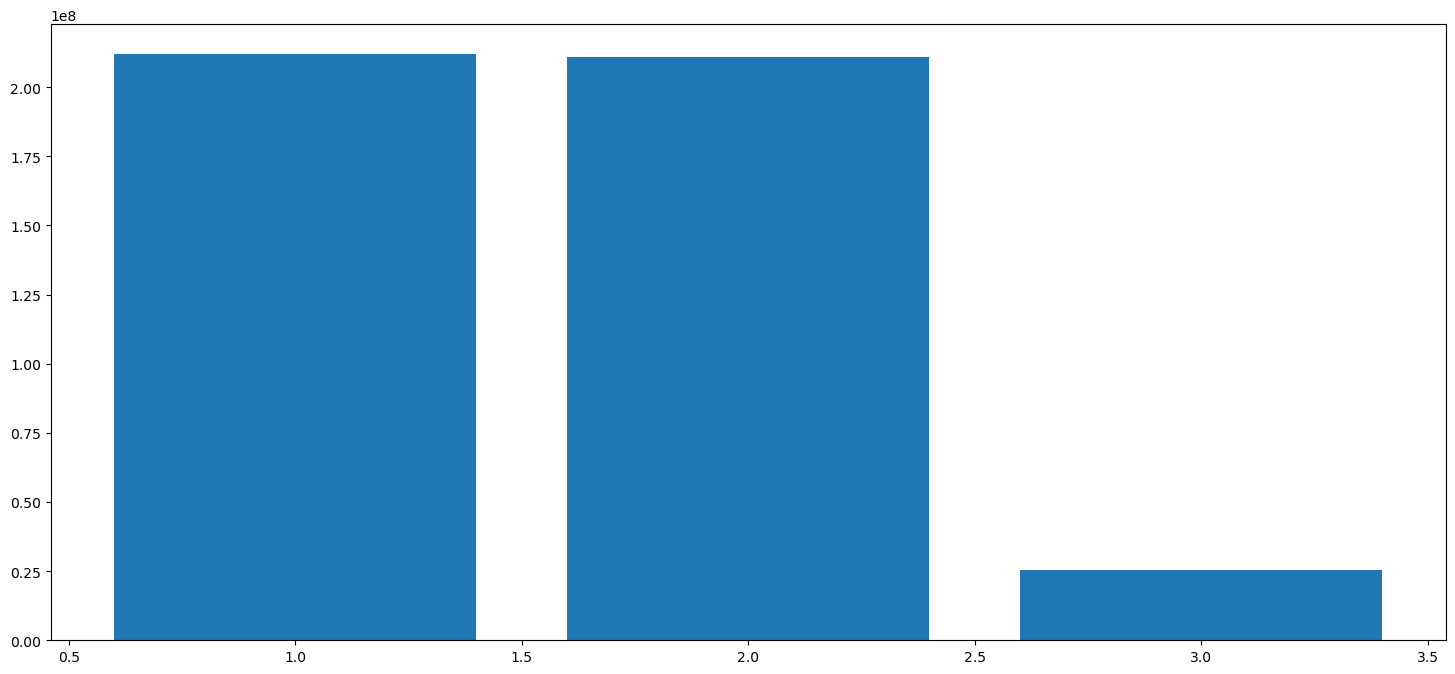

In [22]:
plt.figure(figsize=(18,8))
plt.bar([1, 2, 3], [uno.fun, dos.fun, tres.fun])

## Años con nacimientos

In [25]:
def funcioncosto(beta, X, y):
    m, n=X.shape
    beta=np.reshape(beta, [n, 1])
    y_pred=X @ beta
    error=y_pred - y
    return (error.T @ error)[0][0]

ones2=np.ones([m, 1])
y_vector2=np.reshape(nacimientos, [m, 1])
beta=np.random.rand(2)
x_factor2=np.reshape(xn, [m, 1])
X2=np.hstack((ones2, x_factor2))
uno=opt.minimize(funcioncosto, beta, args=(X2, y_vector2))

beta=np.random.rand(3)
x2_factor2=np.reshape(xn**2, [m, 1])
X22=np.hstack((ones, x_factor2, x2_factor2) )
dos=opt.minimize(funcioncosto, beta, args=(X22, y_vector2))
                                                                                                  
beta=np.random.rand(4)
x3_factor2=np.reshape(xn**3, [m, 1])
X32=np.hstack((ones2, x_factor2, x2_factor2, x3_factor2) )
tres=opt.minimize(funcioncosto, beta, args=(X32, y_vector2))

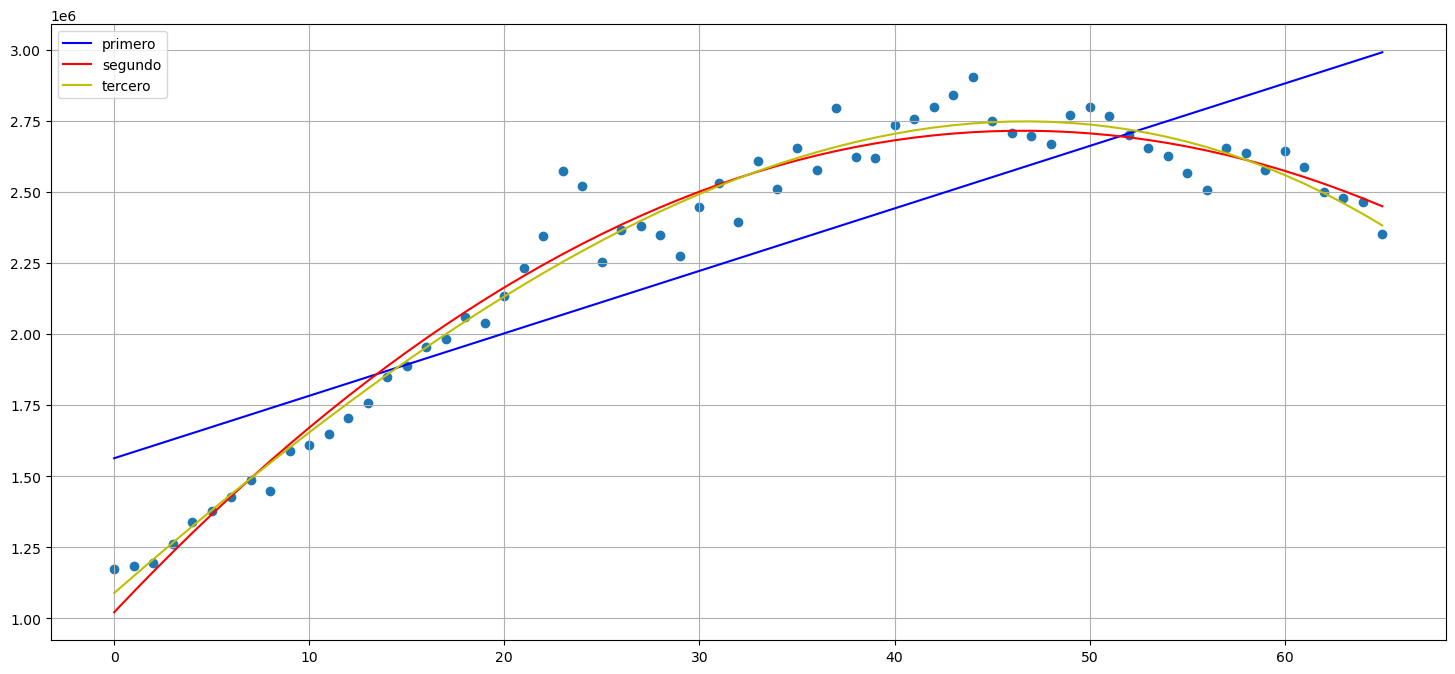

In [27]:
plt.figure(figsize=(18,8))
plt.grid()
plt.scatter(xn, nacimientos)
plt.plot(xn, X2 @ np.reshape(uno.x, [2, 1]), "b" ,label="primero")
plt.plot(xn, X22 @ np.reshape(dos.x, [3, 1]), "r", label="segundo")
plt.plot(xn, X32 @ np.reshape(tres.x, [4, 1]), "y", label="tercero")
plt.legend(loc = "best")

<BarContainer object of 3 artists>

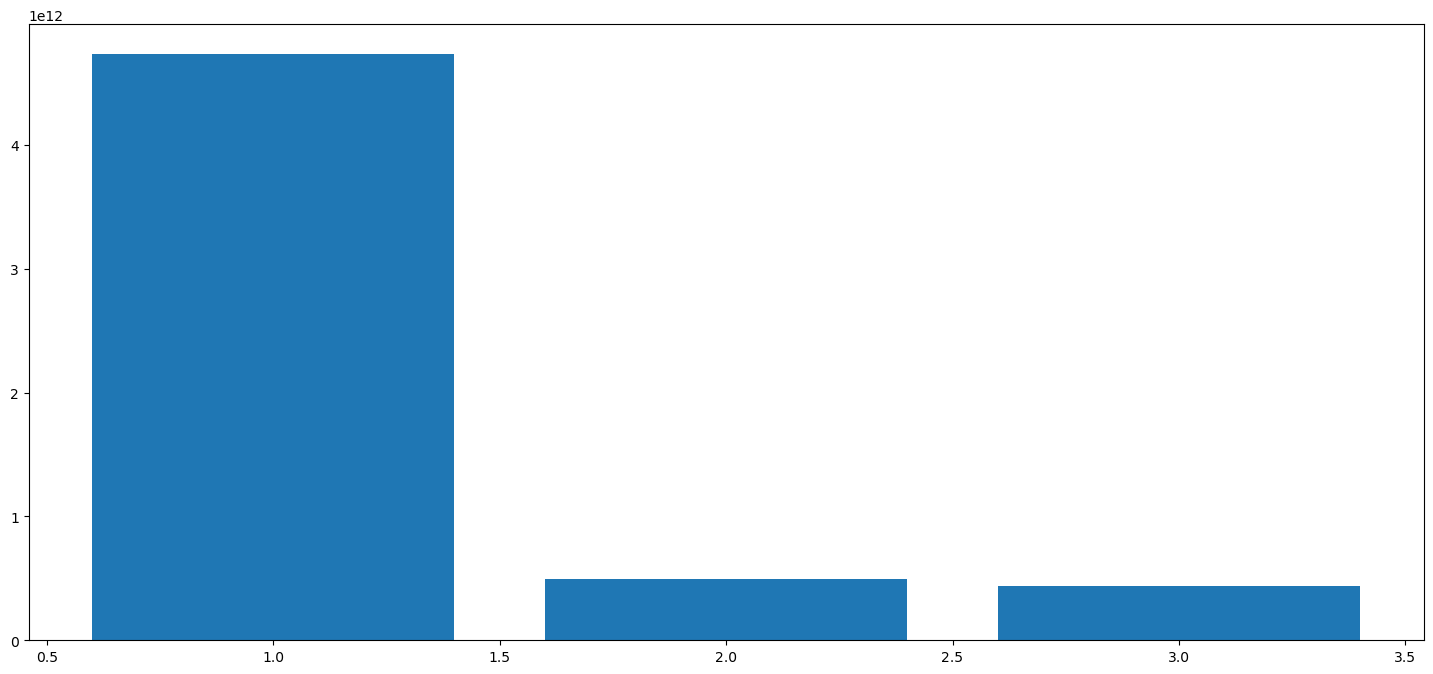

In [28]:
plt.figure(figsize=(18,8))
plt.bar([1, 2, 3], [uno.fun, dos.fun, tres.fun])